Authors:

*   Mohlatlego Nakeng
*   Raymond Chiruka



**Task Description**

In this task we generate final visuals for dashboarding and model deployment. Various visualizations techniques are exploid in order to obtain a window like visuals for our dataset.

In [1]:
#Libaries imports

import numpy as np
import pandas as pd
from textblob import TextBlob
import matplotlib as plt
from google.colab import drive

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv("/content/drive/Shareddrives/MIT808 - group 6/data/Categories.csv") 

In [4]:
df.head(10)

,statuses_text,statuses_retweeted,location_cat,tweets_location,message_creator
0,rt drericding breakingâsingleshot johnson amp ...,False,True,local,Human
1,rt bbcmorelle very good news on novavax vaccin...,False,True,local,Human
2,rt voxdotcom what makes the johnson amp johnso...,False,False,global,Human
3,rt drericding breakingâsingleshot johnson amp ...,False,True,local,Human
4,rt jsavagetweets johnson amp johnson aka janss...,False,True,local,Human
5,rt voxdotcom what makes the johnson amp johnso...,False,False,global,Human
6,rt erictopol big news the jnj vaccine results ...,False,True,local,Human
7,rt drericding breakingâsingleshot johnson amp ...,False,True,local,Human
8,rt thehowie jnj vaccine\n\nthe level of protec...,False,False,global,Human
9,rt helenbranswell 2 the jampj vaccine showed a...,False,True,local,Human


In [5]:
import matplotlib.pyplot as p

create the sentiment feature 

In [6]:
sentiment_objects = [TextBlob(statuses_text) for statuses_text in df['statuses_text']]
# creating the polarity for each tweet
sentiment_objects[0].polarity, sentiment_objects[0]
# Create list of polarity valuesx and tweet text
sentiment_values = [[statuses_text.sentiment.polarity, str(statuses_text)] for statuses_text in sentiment_objects]

In [7]:
# create data frame with the polarity values 
df_polarity = pd.DataFrame(sentiment_values, columns=["polarity", "statuses_text"])

In [8]:
df['polarity']=df_polarity['polarity']

In [9]:
# creating a categorical variable if polarity is less than 0 then sentiment is negative, if  polarity== 0 then sentiment is neutral and else sentiment is positive
conditions = [
    (df['polarity'] < 0),
    (df['polarity'] > 0) ,
    (df['polarity'] ==0)     
    ]

# create a list of the values we want to assign for each condition
values = ['negative', 'positive', 'neutral' ]

# create a new column and use np.select to assign values to it using our lists as arguments
df['sentiment'] = np.select(conditions, values)

In [10]:
df.drop(columns=['polarity'],inplace=True)

In [11]:
df.head()

,statuses_text,statuses_retweeted,location_cat,tweets_location,message_creator,sentiment
0,rt drericding breakingâsingleshot johnson amp ...,False,True,local,Human,positive
1,rt bbcmorelle very good news on novavax vaccin...,False,True,local,Human,positive
2,rt voxdotcom what makes the johnson amp johnso...,False,False,global,Human,neutral
3,rt drericding breakingâsingleshot johnson amp ...,False,True,local,Human,positive
4,rt jsavagetweets johnson amp johnson aka janss...,False,True,local,Human,positive


In [12]:
"""
#create barplots by sentiment for feature is tweets_location or message_creatore
def bar_plots(df,feature):
  loc_df = df.loc[df.feature==feature]
  df.groupby('sentiment').feature.value_counts().unstack(0).plot.barh()
"""

"\n#create barplots by sentiment for feature is tweets_location or message_creatore\ndef bar_plots(df,feature):\n  loc_df = df.loc[df.feature==feature]\n  df.groupby('sentiment').feature.value_counts().unstack(0).plot.barh()\n"

In [13]:
#bar_plots(df,'tweets_location')

create barplots of tweets by location, creator grouped by sentiment.

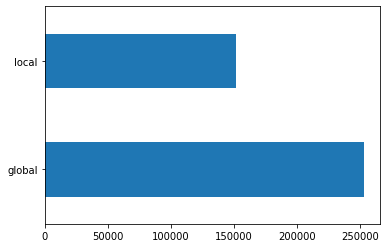

In [14]:
df["tweets_location"].value_counts().plot.barh()

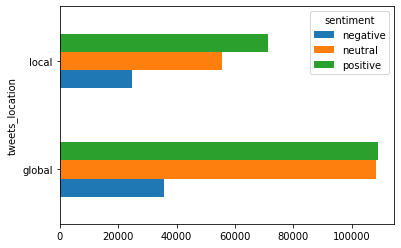

In [15]:
df.groupby('sentiment').tweets_location.value_counts().unstack(0).plot.barh()


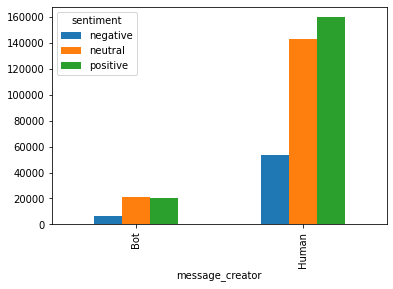

In [16]:
df.groupby('sentiment').message_creator.value_counts().unstack(0).plot.bar()

create word-clouds 

In [17]:
# Importing spacy
import spacy

# Loading model
nlp = spacy.load('en_core_web_sm',disable=['parser', 'ner'])

# Lemmatization with stopwords removal
df['lemmatized']=df['statuses_text'].apply(lambda x: ' '.join([token.lemma_ for token in list(nlp(x)) if (token.is_stop==False)]))

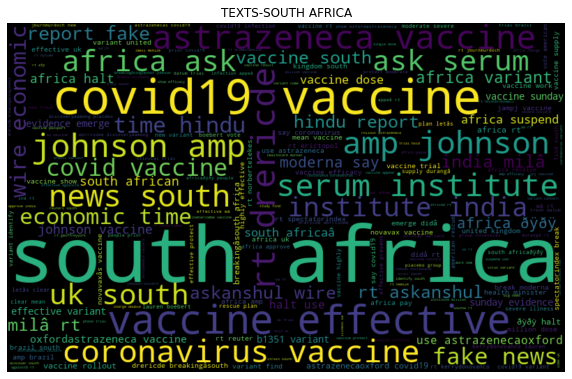

In [18]:
normal_words_sa =' '.join([text for text in df['lemmatized'][df['tweets_location'] == 'local']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words_sa)

plt.pyplot.figure(figsize=(10, 7))
plt.pyplot.imshow(wordcloud, interpolation="bilinear")
plt.pyplot.axis('off')
plt.pyplot.title('TEXTS-SOUTH AFRICA')
plt.pyplot.show()

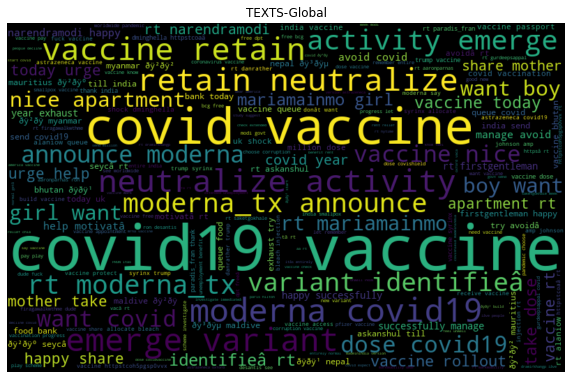

In [19]:
normal_words_global =' '.join([text for text in df['lemmatized'][df['tweets_location'] == 'global']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words_global)

plt.pyplot.figure(figsize=(10, 7))
plt.pyplot.imshow(wordcloud, interpolation="bilinear")
plt.pyplot.axis('off')
plt.pyplot.title('TEXTS-Global')
plt.pyplot.show()

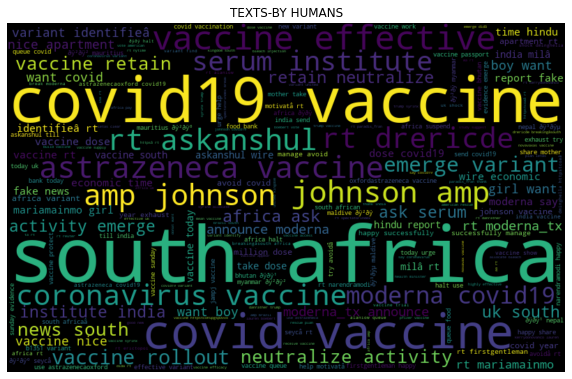

In [20]:
normal_words_sa =' '.join([text for text in df['lemmatized'][df['message_creator'] == 'Human']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words_sa)

plt.pyplot.figure(figsize=(10, 7))
plt.pyplot.imshow(wordcloud, interpolation="bilinear")
plt.pyplot.axis('off')
plt.pyplot.title('TEXTS-BY HUMANS')
plt.pyplot.show()

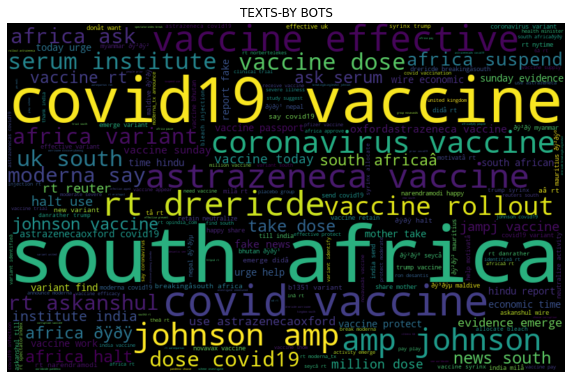

In [21]:
normal_words_sa =' '.join([text for text in df['lemmatized'][df['message_creator'] == 'Bot']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words_sa)

plt.pyplot.figure(figsize=(10, 7))
plt.pyplot.imshow(wordcloud, interpolation="bilinear")
plt.pyplot.axis('off')
plt.pyplot.title('TEXTS-BY BOTS')
plt.pyplot.show()

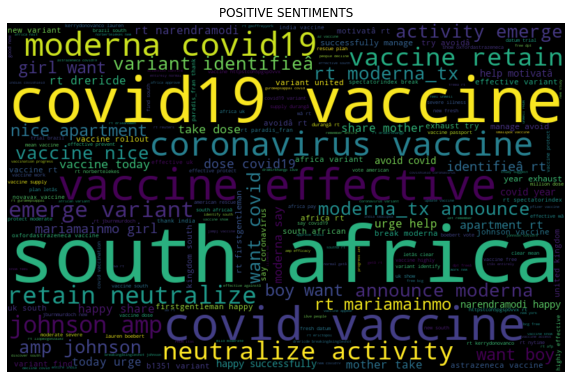

In [22]:
normal_words_sa =' '.join([text for text in df['lemmatized'][df['sentiment'] == 'positive']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words_sa)

plt.pyplot.figure(figsize=(10, 7))
plt.pyplot.imshow(wordcloud, interpolation="bilinear")
plt.pyplot.axis('off')
plt.pyplot.title('POSITIVE SENTIMENTS')
plt.pyplot.show()

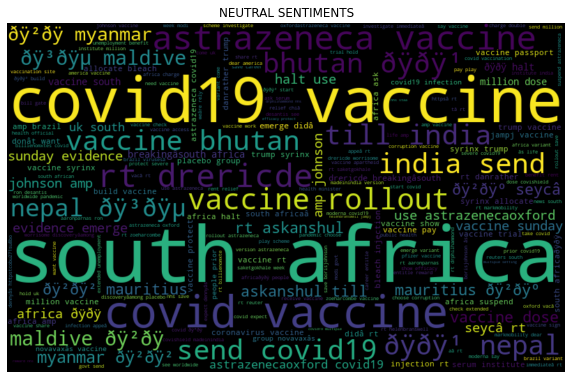

In [23]:
normal_words_sa =' '.join([text for text in df['lemmatized'][df['sentiment'] == 'neutral']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words_sa)

plt.pyplot.figure(figsize=(10, 7))
plt.pyplot.imshow(wordcloud, interpolation="bilinear")
plt.pyplot.axis('off')
plt.pyplot.title('NEUTRAL SENTIMENTS')
plt.pyplot.show()

In [24]:
import nltk
nltk.download('stopwords')
from string import punctuation
from nltk.corpus import stopwords
print(stopwords.words('english')[10:15])

def punctuation_stopwords_removal(lemmatized):
    # filters charecter-by-charecter : ['h', 'e', 'e', 'l', 'o', 'o', ' ', 'm', 'y', ' ', 'n', 'a', 'm', 'e', ' ', 'i', 's', ' ', 'p', 'u', 'r', 'v', 'a']
    remove_punctuation = [ch for ch in lemmatized if ch not in punctuation]
    # convert them back to sentences and split into words
    remove_punctuation = "".join(remove_punctuation).split()
    filtered_sms = [word.lower() for word in remove_punctuation if word.lower() not in stopwords.words('english')]
    return filtered_tweets

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
["you've", "you'll", "you'd", 'your', 'yours']


In [49]:


from wordcloud import WordCloud, STOPWORDS
def draw_word_cloud(df, location, text):
    loc_df = df.loc[df.tweets_location==location]
    loc_df.loc[:, 'lemmatized'] = loc_df['lemmatized'].apply(punctuation_stopwords_removal)
    word_cloud = WordCloud(
                    background_color='white',
                    stopwords=set(STOPWORDS),
                    max_words=50,
                    max_font_size=40,
                    scale=5,
                    random_state=1).generate(str(loc_df['text']))
    fig = plt.figure(1, figsize=(10,10))
    plt.axis('off')
    fig.suptitle(title, fontsize=20)
    fig.subplots_adjust(top=2.3)
    plt.imshow(word_cloud)
    plt.show()



In [48]:
# draw_word_cloud(df)